In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import xarray as xr

from matplotlib import colormaps



In [2]:
result_dir = Path(os.getcwd())

proj_dir = result_dir.parent

os.chdir(proj_dir)

In [3]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [5]:
from utils.results import SimulationResults

RUNID = "val3_xb"

results = SimulationResults(runid=RUNID)

print(results.var_list)
print(results.timestep_output_ids)

['xgr', 'depth_id', 'timestep_id', 'timestamp', 'cumulative_computational_time', 'zgr', 'angles', 'wave_height', 'wave_energy', 'radiation_stress_xx', 'radiation_stress_xy', 'radiation_stress_yy', 'mean_wave_angle', 'velocity_magnitude', 'orbital_velocity', 'run_up', 'water_level', 'thaw_depth', 'abs_xgr', 'abs_zgr', 'ground_temperature_distribution', 'ground_enthalpy_distribution', '2m_temperature', 'sea_surface_temperature', 'solar_radiation_factor', 'solar_radiation_flux', 'long_wave_radiation_flux', 'latent_heat_flux', 'convective_heat_flux', 'total_heat_flux', 'sea_ice_cover', 'wind_velocity', 'wind_direction']
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  9

In [6]:
xgr0 = results.get_var_timestep("xgr", 0)
zgr0 = results.get_var_timestep("zgr", 0)

abs_xgr0 = results.get_var_timestep("abs_xgr", 0).flatten()
abs_zgr0 = results.get_var_timestep("abs_zgr", 0).flatten()
ground_temperature_distribution0 = (results.get_var_timestep(
    "ground_temperature_distribution", 0) - 273.15).flatten()

In [7]:
xgr_xb = results.get_var_timestep("xgr_xb", 1)
print(xgr_xb)

[-6.590000e+00  5.000000e-01  7.590000e+00  1.468100e+01  2.177100e+01
  2.886100e+01  3.595100e+01  4.304200e+01  5.013200e+01  5.722200e+01
  6.430100e+01  7.136000e+01  7.839900e+01  8.541800e+01  9.241800e+01
  9.939900e+01  1.063600e+02  1.133020e+02  1.202240e+02  1.271260e+02
  1.340080e+02  1.408700e+02  1.477110e+02  1.545320e+02  1.613330e+02
  1.681130e+02  1.748720e+02  1.816120e+02  1.883320e+02  1.950300e+02
  2.017080e+02  2.083650e+02  2.150000e+02  2.216150e+02  2.282080e+02
  2.347810e+02  2.413320e+02  2.478630e+02  2.543720e+02  2.608600e+02
  2.673260e+02  2.737700e+02  2.801920e+02  2.865930e+02  2.929720e+02
  2.993300e+02  3.056660e+02  3.119790e+02  3.182700e+02  3.245390e+02
  3.307860e+02  3.370110e+02  3.432130e+02  3.493930e+02  3.555510e+02
  3.616850e+02  3.677970e+02  3.738860e+02  3.799530e+02  3.859970e+02
  3.920180e+02  3.980150e+02  4.039900e+02  4.099410e+02  4.158690e+02
  4.217740e+02  4.276560e+02  4.335140e+02  4.393480e+02  4.451590e+02
  4.50

In [8]:
vmin, vmax = -10, 10

norm = Normalize(vmin, vmax)

sm = ScalarMappable(norm, cmap='coolwarm')

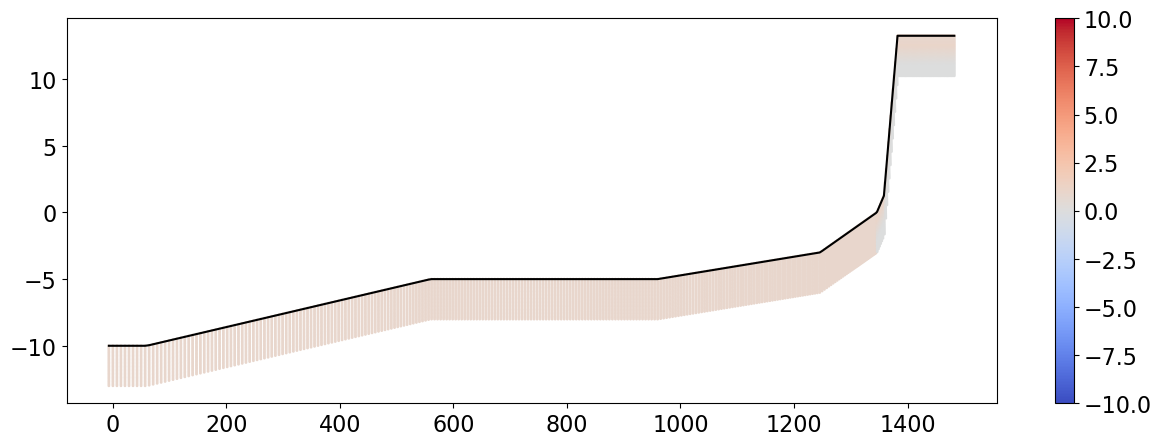

In [9]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr0, zgr0, color='k')

scatter = ax.scatter(abs_xgr0, abs_zgr0, s=1, color=sm.to_rgba(ground_temperature_distribution0))

# ax.set_xlim(1300, 1400)

# ax.set_aspect('equal')

plt.colorbar(sm, ax=ax, norm=norm)

In [10]:
print(ground_temperature_distribution0)

[ 0.93720875  0.92200397  0.89935437 ... -0.0572993  -0.0572993
 -0.0572993 ]


In [11]:
print((results.get_var_timestep(
    "ground_temperature_distribution", 1) - 273.15)[:,0])

[0.93725371 0.93723676 0.93723678 0.93725371 0.93725371 0.93725371
 0.93723678 0.93723677 0.93725371 0.93723676 0.93725371 0.93725371
 0.93725371 0.93725371 0.93723678 0.93723678 0.93723678 0.93725371
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678
 0.93723678 0.93723678 0.93723678 0.93723678 0.93723678 0.9372

So the temperature jumps down after a single timestep. Why? Let's look at the enthalpy

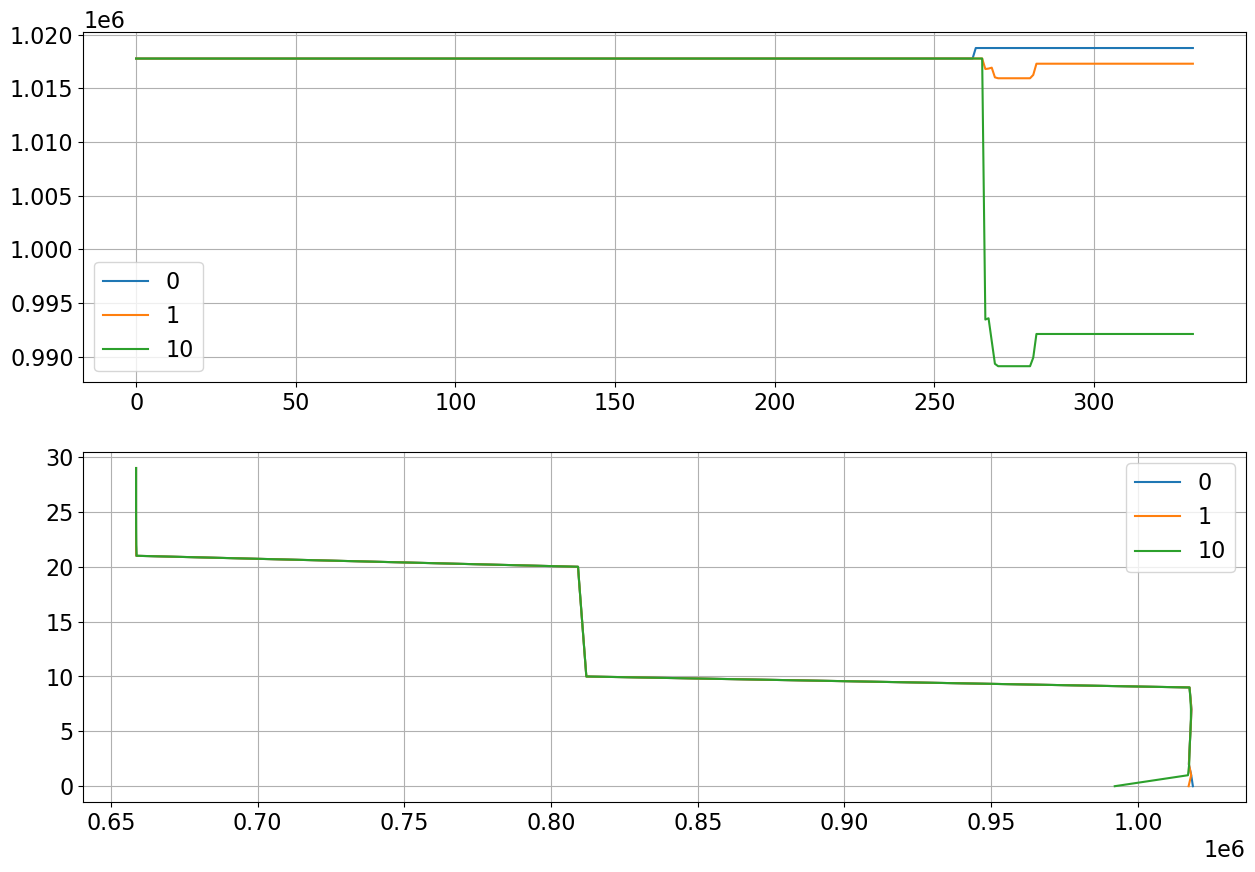

In [12]:
enthalpy0 = results.get_var_timestep("ground_enthalpy_distribution", 0)
enthalpy1 = results.get_var_timestep("ground_enthalpy_distribution", 1)
enthalpy10 = results.get_var_timestep("ground_enthalpy_distribution", 10)

fig, axs = plt.subplots(2, 1, figsize=(15,10))
ax, ax1 = axs

ax.plot(np.arange(enthalpy0.shape[0]), enthalpy0[:,0], label=0)
ax.plot(np.arange(enthalpy1.shape[0]), enthalpy1[:,0], label=1)
ax.plot(np.arange(enthalpy10.shape[0]), enthalpy10[:,0], label=10)

ax1.plot(enthalpy0[300,:], np.arange(enthalpy0.shape[1]), label=0)
ax1.plot(enthalpy1[300,:], np.arange(enthalpy1.shape[1]), label=1)
ax1.plot(enthalpy10[300,:], np.arange(enthalpy10.shape[1]), label=10)

ax.grid()
ax.legend()

ax1.grid()
ax1.legend()

In [13]:
dir = Path(r"p:\11210070-usgscoop-202324-arcticxb\runs\val3_xb")

fpath = os.path.join(dir, "storm1.nc")

storm_ds1 = xr.open_dataset(fpath)

print(storm_ds1)

<xarray.Dataset> Size: 1MB
Dimensions:      (ny: 1, nx: 332, globaltime: 37)
Coordinates:
    globalx      (ny, nx) float64 3kB ...
    globaly      (ny, nx) float64 3kB ...
  * globaltime   (globaltime) float64 296B 0.0 100.0 200.0 ... 3.5e+03 3.6e+03
Dimensions without coordinates: ny, nx
Data variables: (12/15)
    _parameters  float64 8B ...
    x            (globaltime, ny, nx) float64 98kB ...
    y            (globaltime, ny, nx) float64 98kB ...
    zb           (globaltime, ny, nx) float64 98kB ...
    zs           (globaltime, ny, nx) float64 98kB ...
    H            (globaltime, ny, nx) float64 98kB ...
    ...           ...
    Sxx          (globaltime, ny, nx) float64 98kB ...
    Sxy          (globaltime, ny, nx) float64 98kB ...
    Syy          (globaltime, ny, nx) float64 98kB ...
    thetamean    (globaltime, ny, nx) float64 98kB ...
    vmag         (globaltime, ny, nx) float64 98kB ...
    urms         (globaltime, ny, nx) float64 98kB ...
Attributes:
    Conventio

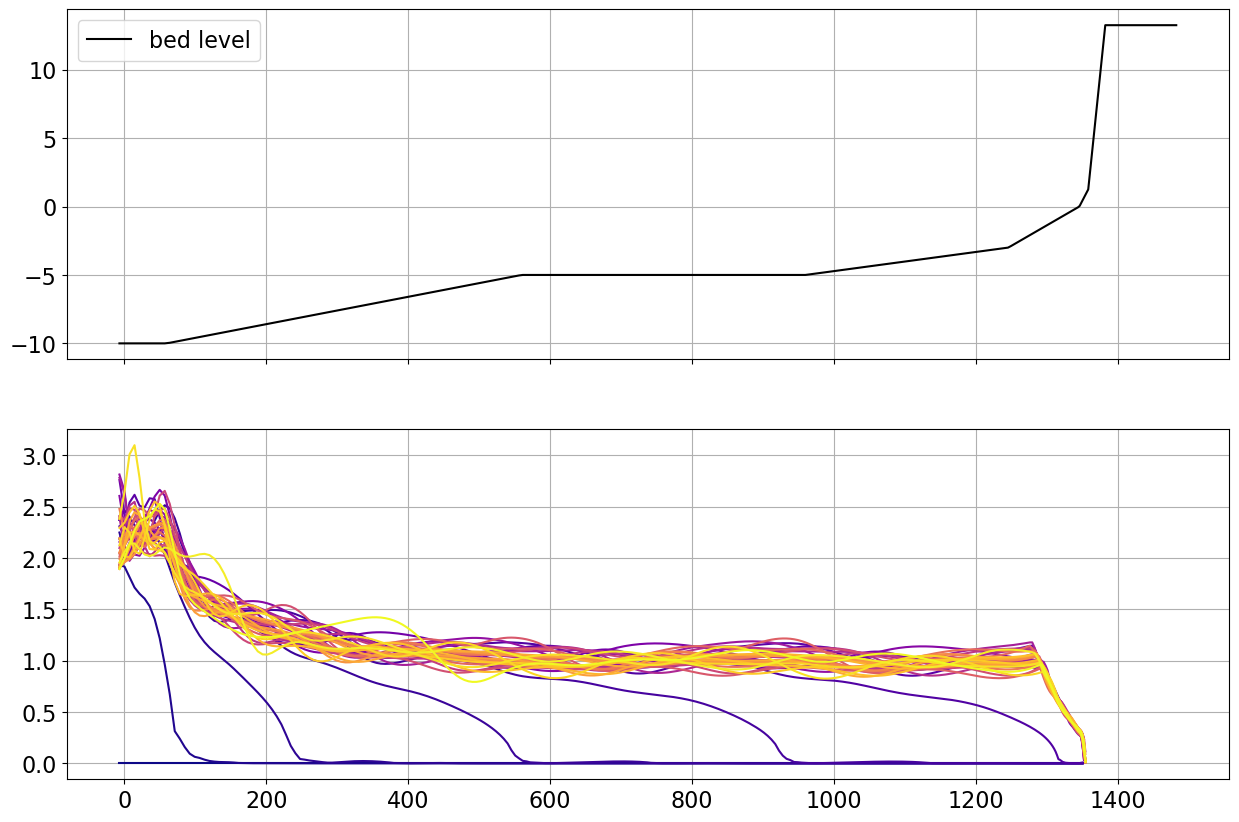

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax0, ax1 = axs

cmap = colormaps["plasma"]
colors = cmap(np.linspace(0, 1, len(storm_ds1.globaltime.values)))

ds0 = storm_ds1.sel(globaltime=storm_ds1.globaltime.values[0]).squeeze()

x = ds0.x.values
z = ds0.zb.values

ax0.plot(x, z, label='bed level', color='k')

for i, t in enumerate(storm_ds1.globaltime.values):
    
    ds_slice = storm_ds1.sel(globaltime=t).squeeze()
    
    x = ds_slice.x.values
    H = ds_slice.H.values
    
    ax1.plot(x, H, label=t, color=colors[i])
    
    
ax0.legend()
ax0.grid()

ax1.grid()
    


In [15]:
dir = Path(r"p:\11210070-usgscoop-202324-arcticxb\runs\val3_xb")

fpath = os.path.join(dir, "storm2.nc")

storm_ds2 = xr.open_dataset(fpath)

print(storm_ds2)

<xarray.Dataset> Size: 1MB
Dimensions:      (ny: 1, nx: 332, globaltime: 37)
Coordinates:
    globalx      (ny, nx) float64 3kB ...
    globaly      (ny, nx) float64 3kB ...
  * globaltime   (globaltime) float64 296B 0.0 100.0 200.0 ... 3.5e+03 3.6e+03
Dimensions without coordinates: ny, nx
Data variables: (12/15)
    _parameters  float64 8B ...
    x            (globaltime, ny, nx) float64 98kB ...
    y            (globaltime, ny, nx) float64 98kB ...
    zb           (globaltime, ny, nx) float64 98kB ...
    zs           (globaltime, ny, nx) float64 98kB ...
    H            (globaltime, ny, nx) float64 98kB ...
    ...           ...
    Sxx          (globaltime, ny, nx) float64 98kB ...
    Sxy          (globaltime, ny, nx) float64 98kB ...
    Syy          (globaltime, ny, nx) float64 98kB ...
    thetamean    (globaltime, ny, nx) float64 98kB ...
    vmag         (globaltime, ny, nx) float64 98kB ...
    urms         (globaltime, ny, nx) float64 98kB ...
Attributes:
    Conventio

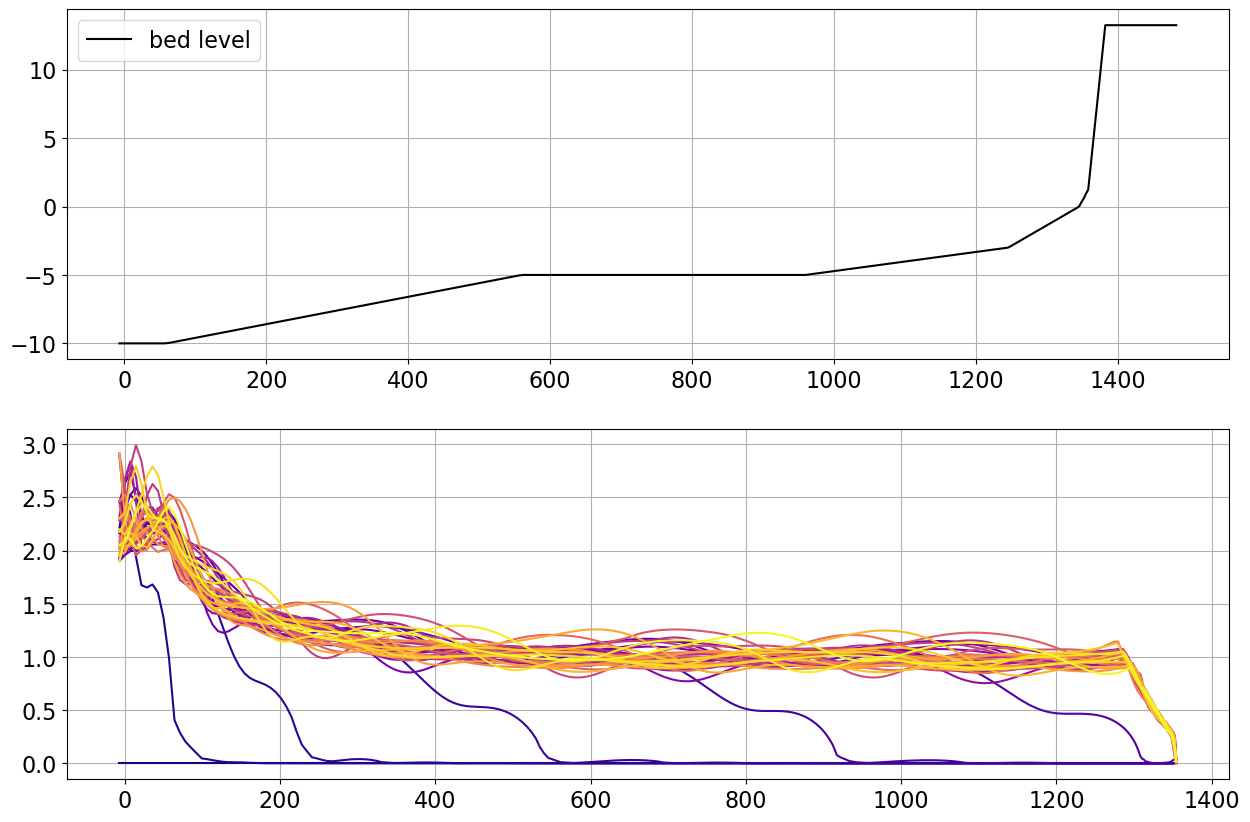

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
ax0, ax1 = axs

cmap = colormaps["plasma"]
colors = cmap(np.linspace(0, 1, len(storm_ds2.globaltime.values)))

ds0 = storm_ds2.sel(globaltime=storm_ds2.globaltime.values[0]).squeeze()

x = ds0.x.values
z = ds0.zb.values

ax0.plot(x, z, label='bed level', color='k')

for i, t in enumerate(storm_ds2.globaltime.values):
    
    ds_slice = storm_ds2.sel(globaltime=t).squeeze()
    
    x = ds_slice.x.values
    H = ds_slice.H.values
    
    ax1.plot(x, H, label=t, color=colors[i])
    
    
ax0.legend()
ax0.grid()

ax1.grid()
    
